<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Accessing-the-data" data-toc-modified-id="Accessing-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Accessing the data</a></span></li><li><span><a href="#Questions-addressed-in-this-notebook" data-toc-modified-id="Questions-addressed-in-this-notebook-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Questions addressed in this notebook</a></span></li><li><span><a href="#How-the-data-analyzed-here-is-generated" data-toc-modified-id="How-the-data-analyzed-here-is-generated-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>How the data analyzed here is generated</a></span></li><li><span><a href="#Why-the-S-unit-generators-are-not-listed" data-toc-modified-id="Why-the-S-unit-generators-are-not-listed-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Why the S-unit generators are not listed</a></span></li><li><span><a href="#Why-the-data-is-processed-this-way" data-toc-modified-id="Why-the-data-is-processed-this-way-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Why the data is processed this way</a></span></li><li><span><a href="#Future-to-do-items" data-toc-modified-id="Future-to-do-items-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Future to-do items</a></span></li></ul></li><li><span><a href="#Packages-and-setup" data-toc-modified-id="Packages-and-setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Packages and setup</a></span></li><li><span><a href="#Overview-of-all-data" data-toc-modified-id="Overview-of-all-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Overview of all data</a></span><ul class="toc-item"><li><span><a href="#All-S-unit-data" data-toc-modified-id="All-S-unit-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>All S-unit data</a></span></li></ul></li><li><span><a href="#Class-number" data-toc-modified-id="Class-number-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Class number</a></span><ul class="toc-item"><li><span><a href="#Distribution-of-class-number-over-N" data-toc-modified-id="Distribution-of-class-number-over-N-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Distribution of class number over N</a></span></li><li><span><a href="#Average-time-to-generate-the-class-group" data-toc-modified-id="Average-time-to-generate-the-class-group-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Average time to generate the class group</a></span></li></ul></li><li><span><a href="#Fundamental-units" data-toc-modified-id="Fundamental-units-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fundamental units</a></span></li><li><span><a href="#S-unit-rank" data-toc-modified-id="S-unit-rank-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>S-unit rank</a></span><ul class="toc-item"><li><span><a href="#Rank-frequency" data-toc-modified-id="Rank-frequency-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Rank frequency</a></span></li><li><span><a href="#Distribution-of-rank-over-N" data-toc-modified-id="Distribution-of-rank-over-N-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Distribution of rank over N</a></span></li></ul></li><li><span><a href="#Rank-of-S-unit-equations" data-toc-modified-id="Rank-of-S-unit-equations-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Rank of S-unit equations</a></span></li><li><span><a href="#Garbaggio-as-far-as-I-know" data-toc-modified-id="Garbaggio-as-far-as-I-know-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Garbaggio as far as I know</a></span></li><li><span><a href="#Comparison-with-N" data-toc-modified-id="Comparison-with-N-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Comparison with N</a></span></li></ul></div>

# Introduction

This notebook aims to analyze the S-unit equation data generated from the Thue-Mahler forms of absolute discriminant up to $10^6$. This data is generated in MAGMA and periodically updated onto dropbox. 

## Accessing the data

The data is available on dropbox, under the directory ThueMahler/Data/SUnitEqData. This data is also backed up on several private repos, which I update periodically as the code runs.

## Questions addressed in this notebook

* Class number and class group:
    * Which class number occurs most frequently?
    * What is the largest class number we should expect to see?
    * What is the distribution of class number vs conductor?
    * How long does the average class group take to generate?  
             
       
* Fundamental units:
    * What percentage of the data has $r = 1$ vs $r = 2$?  
               
        
* S-unit rank:
    * How many S-unit equations must be solved?
    * Which rank number occurs the most frequently?
    * What is the distribution of rank vs conductor?
    * How many S-unit equations does each Thue-Mahler form lead to, on average?
    * How long does the average S-unit equation take to generate?
    * Does computation time of S-unit equations increase with the conductor, $N$?
    * What is the most time-consuming part of generating an S-unit equation?


* Number fields:
    * How many unique number fields are there?
    * Is there any overlap of fields between Thue-Mahler equations?
       
       
* Thue equations:
    * Is there any overlap of Thue equations?
    * How many Thue equations must be solved, taking into account any overlap?
    * What is the average size of the right-hand side of a Thue equation?
    
       
* Obstructions:
    * How many Thue-Mahler equations can be ruled out by local obstructions?
    * What is the distribution of local obstructions over the conductor?
    * How many Thue-Mahler equations yield partial obstructions?
    * What, on average, is the partial obstruction observed?


## How the data analyzed here is generated

The algorithm takes, as its input, the conductor and corresponding Thue-Mahler forms of absolute discriminant up to $10^6$. Recall, we aim to solve 
$$ F(u,v) = a p_1^{n_1} \cdots p_v^{n_v}, $$
where
$$ F(u,v) = c_0 u^3 + c_1 u^2 v + c_2 u v^2 + c_3 v^3. $$
1. The algorithm begins by verifying any possible obstructions, ruling out any forms for which no S-unit equations are possible. 
2. For those forms without local obstructions, we test several $GL_2(\mathbb{Z})$ actions on the Thue-Mahler form to determine the optimal form to proceed with. These $GL_2(\mathbb{Z})$ actions are selected by solving the Thue-equation $F(a,c) = x$ for $x \in \{1,\dots,20\} \cup \{p : p \text{ rational prime } \le 200 \}$. We use the resulting solutions $a,c$ to determine $b,d$ and therefore the resulting $GL_2(\mathbb{Z})$ action. Under this action, $c_0$ becomes $x$: $$ F(au+bv,cu+dv) = x u^3 + d_1 u^2 v + d_2 u v^2 + d_3 v^3 $$ for some integers $d_1,d_2,d_3$. For each such action, we generate all S-unit equations as outlined below, and choose the action and Thue-Mahler form leading to the least S-unit equations. The reasoning behind our choice of $GL_2(\mathbb{Z})$ actions is as follows. The Thue-Mahler solver only generates those solutions having $(v,c_0) = 1$. However, the solutions with $(v,c_0) \neq 1$ lead to relevant elliptic curves. To account for these solutions, if $c_0 \neq 1$, we are forced to apply several linear changes of variables to obtain a family of equations of the form
$$F(u,v) = u^3 + e_1 u^2 v + e_2 u v^2 + e_3 v^3 = a_ip_1^{n_1} \cdots p_v^{n_v}$$ for some integers $e_1,e_2,e_3$, where the constant $a_i$ varies over all such equations depending on $c_0$. If one can find an action which forces $c_0 = 1$, then we have only one possible $a_i$ value to contend with. If this is not possible, our next best choice is to force $c_0$ to have as few divisors as possible. ** We note here that the total number of S-unit equations counts all S-unit equations as we vary over all possible $a_i$**.
3. Having selected an optimal Thue-Mahler form, we then use the theorem of Bennett-Gherga-Rechnitzer to determine any bounds on the exponents $n_i$ of the primes $p_i \in \{p_1, \dots, p_v\}$. The exponents we are able to explicitly determine are pushed into the constant $a$ with their corresponding prime base. That is, if we know that $n_i$ can only take on the values among $\{1,2\}$, we redefine two possibilities for $a$ as follows: either $a = ap_i^{1}$, or $a = ap_i^2$. We then generate all possible combinations of these initial prime bounds and $a$ values, listing, for each case, the primes $\{p_1, \dots, p_v\}$ whose exponents we do not know, and the corresponding constant, $a$. 
4. At this point, it may be possible that some cases do not have any primes whose exponents we do not know. In this case, we are left to solve the Thue equation $$ F(u,v) = a. $$ We store this information in the file ThueEqToSolve.csv and remove these cases from our list.
5. For each remaining element of the list, we generate all corresponding ideal equations, invoking the new and improved Prime Ideal Removing Lemma. 
6. From each ideal equation, we generate all corresponding S-unit equations.

Throughout this process, we remove any resulting Thue equations from the list and store them in ThueEqToSolve.csv. The output is printed among the files 
* SUnitErr.txt
    * Tracks any errors in the code that may arise. Thus far, no errors have been reported.
* NoSUnitEqPossible.csv
    * This file lists the conductors and corresponding Thue-Mahler forms for which no S-unit equations are possible due to obstructions.
* NoSUnitEqNeeded.csv
    * Lists the forms which either reduce to Thue equations or which do not yield any S-unit equations.
* ThueEqToSolve.csv
    * Lists all Thue equations remaining to be solved.
* TMFormData.csv
    * Lists all corresponding relevant data for generating S-unit equations.
    
## Why the S-unit generators are not listed

MAGMA, it seems, does not do a great job of restoring data previously calculated. I've tried to store the S-unit equations in a file and recreate the environment in a new MAGMA session, but the result is finicky at best; MAGMA claims that the elements are not compatible with each other, or in some cases, are not even the same elements that I stored! Probably there is a way to work around this, but storage becomes a problem at that point. In either case, I've omitted trying to do this, since reading in all the generators and then forcing them into the same field seems more like a headache than just recalculating the fields and their elements. 

## Why the data is processed this way

Probably everything here can be done far more efficiently by a data analyst and someone more familiar with Python than I am. I've learned this all on the fly in about a week. **If there is a better way to look at some of this data, please let me know.**

## Future to-do items

As the data grows, using `pandas` might become cumbersome and slow. At that point, we might have to switch to either using `dask` or using only a subset of all of the data. 

# Packages and setup

By default, this notebook will be saved in the same directory on dropbox as the data files, ThueMahler/Data/SUnitEqData. If all works correctly in this notebook, you should not need to edit the file path names to load the data here.

In [1]:
# import therelevant packages and define any relevant functions

import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline
from ast import literal_eval

# set dataframe to display 2 decimal places
pd.options.display.float_format = "{:.2f}".format

def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [2]:
# read in data from files
# for speed up of this process, comment out the files you do not plan on analyzing

# TO DO: save this file with the data on dropbox

TM_data = pd.read_csv(
    '/Users/adela016/Documents/Work/Postdoc/ThueMahler/Data/SUnitEqData/TMFormData.csv',index_col=False)

NoSUnitEqPossible_data = pd.read_csv(
    '/Users/adela016/Documents/Work/Postdoc/ThueMahler/Data/SUnitEqData/NoSUnitEqPossible.csv',index_col=False)

NoSUnitEqNeeded_data = pd.read_csv(
    '/Users/adela016/Documents/Work/Postdoc/ThueMahler/Data/SUnitEqData/NoSUnitEqNeeded.csv',index_col=False)

ThueEqToSolve_data = pd.read_csv(
    '/Users/adela016/Documents/Work/Postdoc/ThueMahler/Data/SUnitEqData/ThueEqToSolve.csv',index_col=False)


# Overview of all data

Here, we take a quick glance at all of the data collected so far, as well as some basic analytics for each dataset.

## All S-unit data

Recall that 
$$ F(u,v) = a p_1^{n_1} \cdots p_v^{n_v}, \quad \text{ where } \quad F(u,v) = c_0 u^3 + c_1 u^2 v + c_2 u v^2 + c_3 v^3. $$
The data presented in the dataframes below is defined here.
* **N**: The conductor.
* **form**: The coefficients of $F$, $c_0, \dots c_3$, listed as `(c_0,...,c_3)`.
* **optimal form**: The coefficients of $F$, under a $GL_2(\mathbb{Z})$ action, yielding the fewest S-unit equations. These coefficients are listed as `(d_0,...,d_3)` where $$F(u,v) = d_0 u^3 + d_1 u^2 v + d_2 u v^2 + d_3 v^3. $$
* **min poly**: The coefficients of the minimal polynomial of $K = \mathbb{Q}(\theta)$, where $\theta$ is a root of $F(t,1)$.
* **partial obstructions**: The set of primes $p \in \{p_1, \dots, p_v\}$ which may only appear with exponent $0$ in $F(u,v) = a p_1^{n_1} \cdots p_v^{n_v}$.
* **class number**: The class number of $K$.
* **no ideal eq**: The number of ideal equations after applying the (refined) Prime Ideal Removing Lemma.
* **no Thue eq**: The number of Thue equations to be solved. These equations are stored in ThueEqToSolve.csv and are excluded from the S-unit equation computation.
* **S-unit ranks**: The ranks of each S-unit equation corresponding to $N$,$F$.
* **local obstruction time**: The CPU time required to verify $N$,$F$ for local obstructions.
* **GL2Z action time**: The CPU time required to determine the $GL_2(\mathbb{Z}$ action and resulting coefficients $(d_0, \dots, d_3)$ yielding the least S-unit equations.
* **class group time**: The CPU time required to determine the class group of $K$.
* **unit group time**: The CPU time required to determine the unit group of $K$.
* **ideal eq time**: The CPU time required to determine all ideal equations and apply the PIRL.
* **Thue eq time**: The CPU time required to determine and remove any Thue equations from the list.
* **S-unit time**: The CPU time required to convert all ideal equations into S-unit equations.
* **bound time**: The CPU time required to determine the large upper bound on the exponents $n_i$.
* **total time**: The total CPU time from the start of the algorithm to the end.

In [52]:
print('Largest conductor encountered so far:', TM_data['N'].max())
print('Total number of S-unit equations to solve:', (TM_data['S-unit ranks'].map(len)).sum())

Largest conductor encountered so far: 121858
Total number of S-unit equations to solve: 5533762


In [70]:
display(TM_data.head())
display(TM_data.describe())

# generate the mean of all values over N
# that is, generate the mean of all other columns over any row having the same N
TM_data_mean = TM_data.groupby('N').mean().reset_index()

,N,form,optimal form,min poly,partial obstructions,class number,r,no ideal eq,no Thue eq,S-unit ranks,local obstruction time,GL2Z action time,class group time,unit group time,ideal eq time,Thue eq time,S-unit time,bound time,total time
0,45,"(1,3,3,3)","(1,3,3,3)","(1,3,3,3)",None,1,1,2,0,"[2, 2]",0.14,1.51,0.05,0.00,0.00,0.00,0.01,0.00,1.74
1,26,"(2,2,3,1)","(2,2,3,1)","(1,2,6,4)",[3],1,1,3,1,"[2, 2, 3]",0.12,1.82,0.04,0.00,0.01,0.00,0.01,0.00,2.01
2,22,"(1,2,2,2)","(1,2,2,2)","(1,2,2,2)",[3],1,1,2,2,"[2, 2]",0.20,1.93,0.03,0.00,0.01,0.00,0.00,0.00,2.22
3,18,"(1,0,3,2)","(1,0,3,2)","(1,0,3,2)",None,1,1,1,1,[2],0.19,1.95,0.06,0.00,0.01,0.00,0.01,0.00,2.23
4,54,"(1,0,3,2)","(1,0,3,2)","(1,0,3,2)",None,1,1,2,2,"[2, 2]",0.13,1.73,0.06,0.01,0.00,0.00,0.01,0.00,1.95


,N,class number,r,no ideal eq,no Thue eq,local obstruction time,GL2Z action time,class group time,unit group time,ideal eq time,Thue eq time,S-unit time,bound time,total time
count,449486.00,449486.00,449486.00,449486.00,449486.00,449486.00,449486.00,449486.00,449486.00,449486.00,449486.00,449486.00,449486.00,449486.00
mean,65648.65,1.85,1.18,13.06,1.01,0.41,27.45,0.06,0.01,1.16,0.00,0.03,0.01,29.17
std,33983.42,2.44,0.38,17.24,1.27,0.33,144.48,0.01,0.01,4.24,0.01,0.06,0.01,145.30
min,11.00,1.00,1.00,1.00,0.00,0.07,0.26,0.02,0.00,0.00,0.00,0.00,0.00,0.50
25%,37271.00,1.00,1.00,4.00,0.00,0.12,2.99,0.05,0.00,0.06,0.00,0.01,0.00,3.66
50%,67185.00,1.00,1.00,8.00,1.00,0.29,5.37,0.05,0.00,0.14,0.00,0.02,0.00,6.15
75%,95112.00,2.00,1.00,15.00,2.00,0.62,11.03,0.06,0.01,0.49,0.01,0.04,0.01,12.27
max,121858.00,74.00,2.00,810.00,24.00,9.29,7530.38,0.36,0.04,859.63,0.45,3.89,0.41,7533.75


# Class number

In this section, we attempt to answer the following questions about the class number:
* Which class number occurs most frequently?
* What is the largest class number we should expect to see?
* What is the distribution of class number vs conductor?
* How long does the average class group take to generate?  


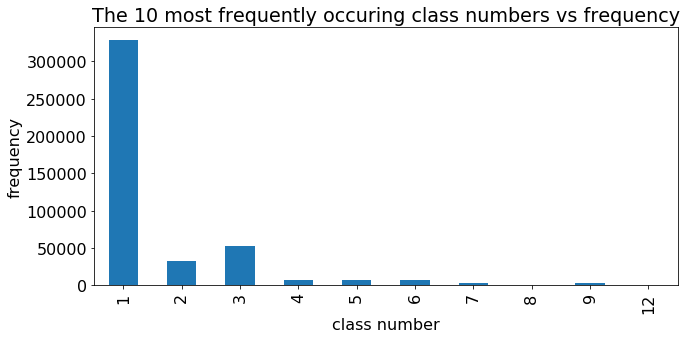

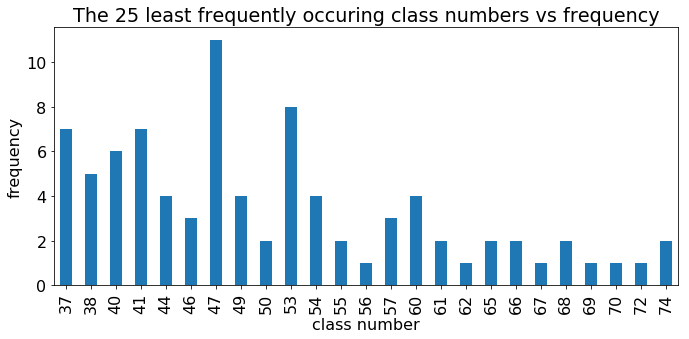

In [103]:
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16

# display 10 most occuring class numbers
pd.value_counts(TM_data['class number'].values).nlargest(10).sort_index().plot(kind='bar', figsize=(10,5))
plt.title('The 10 most frequently occuring class numbers vs frequency')
plt.xlabel('class number')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

# display 25 least occuring class numbers
pd.value_counts(TM_data['class number'].values).nsmallest(25).sort_index().plot(kind='bar', figsize=(10,5))
plt.title('The 25 least frequently occuring class numbers vs frequency')
plt.xlabel('class number')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()


## Distribution of class number over N

This next graph is perhaps not that helpful, but illustrates how the class number may change over $N$

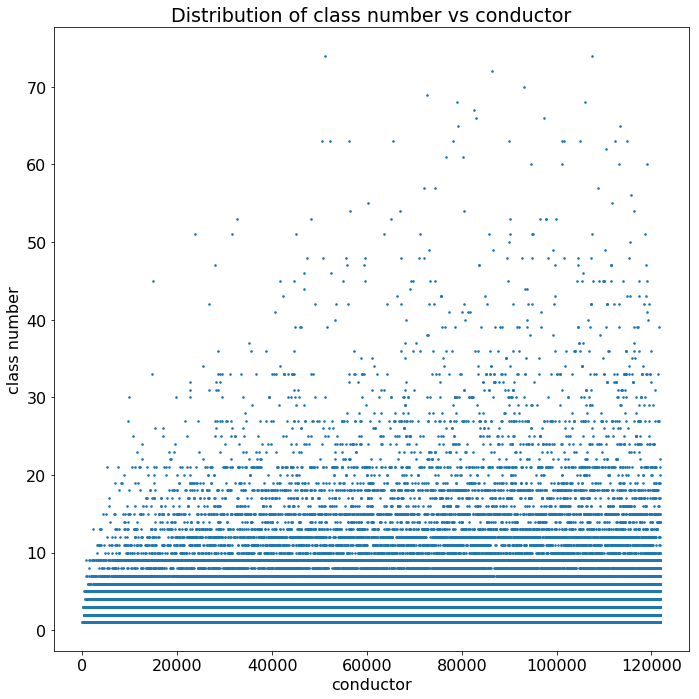

In [88]:
# class number vs N
plt.figure(figsize=(10,10))
plt.scatter(TM_data['N'], TM_data['class number'], s=2.5)
plt.xlabel('conductor')
plt.ylabel('class number')
plt.title('Distribution of class number vs conductor')
plt.tight_layout()
plt.show()

Let's instead take a smoothed out version of this graph. First, we take the mean class number over any rows sharing the same conductor. Of this data, we compute the mean and standard deviation of the class number over every 2500 entries to obtain the following graph. 

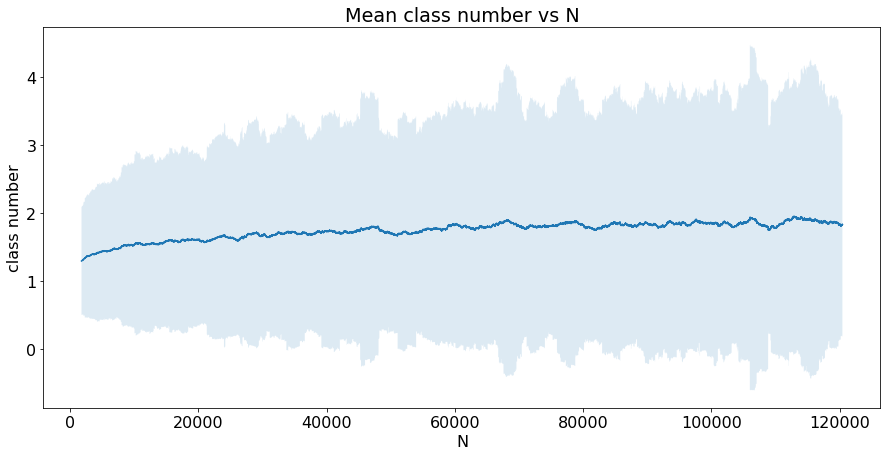

In [166]:
# generate a new dataframe for N, class number
data = {'N': TM_data_mean['N'], 'class number': TM_data_mean['class number'] }
TM_data_h = pd.DataFrame(data, columns = ['N','class number']).set_index('N')

# take the mean, std class number over every 2500 entries
TM_data_rolling_h_mean = TM_data_h.rolling(2500,center=True,win_type=None).mean().dropna()
TM_data_rolling_h_std = TM_data_h.rolling(2500,center=True,win_type=None).std().dropna()

fig, ax = plt.subplots(1,1,figsize=(15,7))

# graph the standard deviation of the class number
ax.fill_between(
    TM_data_rolling_h_std.index, 
    TM_data_rolling_h_mean['class number'] - TM_data_rolling_h_std['class number'], 
    TM_data_rolling_h_mean['class number'] + TM_data_rolling_h_std['class number'],
    alpha=.15,
)
# graph the mean class number over N
ax.plot(TM_data_rolling_h_mean.index, TM_data_rolling_h_mean['class number'].values)
ax.set_xlabel('N')
ax.set_ylabel('class number')
ax.set_title('Mean class number vs N')
plt.show()

## Average time to generate the class group

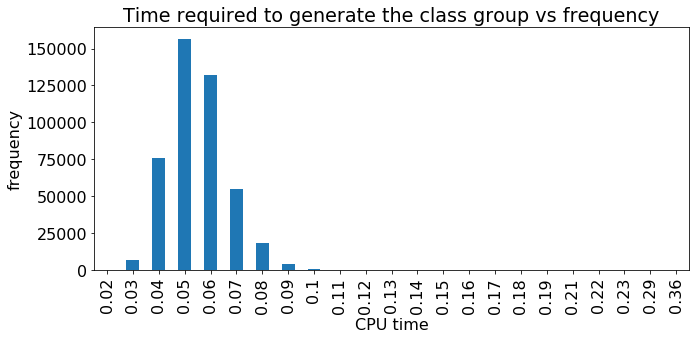

In [106]:
# CPU class group time vs frequency
pd.value_counts(TM_data['class group time'].values).sort_index().plot(kind='bar', figsize=(10,5))
plt.title('Time required to generate the class group vs frequency')
plt.xlabel('CPU time')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

# Fundamental units

Here, we attempt to answer the following questions about the fundamental units:
* What percentage of the data has $r = 1$ vs $r = 2$?

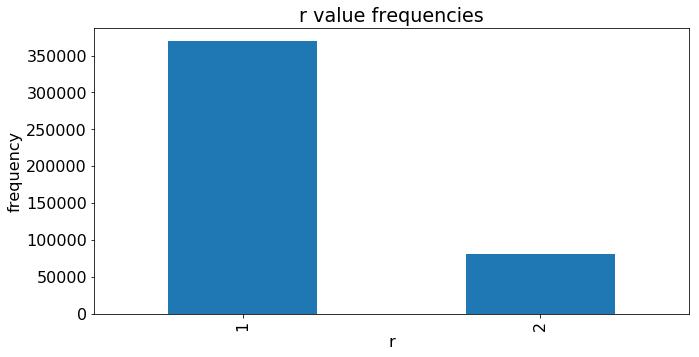

In [92]:
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16

pd.value_counts(df['r'].values).plot(kind='bar', figsize=(10,5))
plt.xlabel('r')
plt.ylabel('frequency')
plt.tight_layout()
plt.title('r value frequencies')
plt.show()


# S-unit rank

In this section, we look at S-unit ranks and try to answer:
* How many S-unit equations must be solved?
* Which rank number occurs the most frequently?
* What is the distribution of rank vs conductor?
* How many S-unit equations does each Thue-Mahler form lead to, on average?
* How long does the average S-unit equation take to generate?
* Does computation time of S-unit equations increase with the conductor, $N$?
* What is the most time-consuming part of generating an S-unit equation?

In [109]:
print('Total number of S-unit equations to solve:', (TM_data['S-unit ranks'].map(len)).sum())

Total number of S-unit equations to solve: 5533762


In [146]:
# convert strings into arrays
TM_data['S-unit ranks'] = TM_data['S-unit ranks'].apply(literal_eval)
TM_data['partial obstructions'] = TM_data['partial obstructions'].apply(literal_eval)

# expand dataframe for each S-unit equation
TM_data_explode = explode(TM_data, 'S-unit ranks',preserve_index = False)
data = {'N': TM_data_explode['N'], 'S-unit ranks': TM_data_explode['S-unit ranks'] }
TM_data_rank = pd.DataFrame(data, columns = ['N','S-unit ranks'])


## Rank frequency

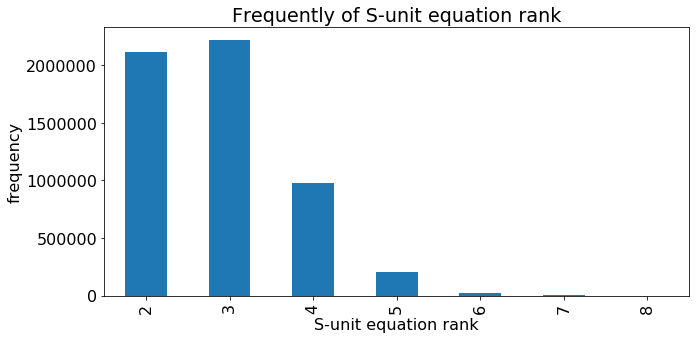

In [142]:
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16

# graph the frequency of each rank
pd.value_counts(TM_data_rank['S-unit ranks'].values).sort_index().plot(kind='bar', figsize=(10,5))
plt.title('Frequently of S-unit equation rank')
plt.xlabel('S-unit equation rank')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()


## Distribution of rank over N

We begin by first determining the conductor yielding the largest number of S-unit equations. We then count the number of rank $n$ S-unit equations over each conductor, and determine the largest number of S-unit equations of a single rank value, $n$.  

In [165]:
# frequencies for each `(N, rank)` pair, grouped by rank
TM_data_rank2 = (
    TM_data_rank.groupby(['N','S-unit ranks'])
    .N.count()
    .rename('counts')
    .reset_index()
 #   .groupby(['S-unit ranks'])
)

# conductor yielding largest number of S unit equations of given rank
display(TM_data_rank2.loc[TM_data_rank2['counts'] == TM_data_rank2['counts'].max()])


,N,S-unit ranks,counts
237641,100775,2,1521


In [ ]:

# Take the first group from df_rnk and compute some descriptive statistics using a rolling average/std
rank_value, group_df = next(df_rnk.__iter__())  # don't write code like this; use .get_group(...)
print('curves with rank:', rank_value)
group_df = group_df.set_index('N')
group_roll = group_df.rolling(5, center=True, win_type=None) #didn't work for me: win_type='triang' but did for Aaron
group_roll = group_roll.counts.agg(['mean', 'std']).dropna()

fig, ax = plt.subplots(1,1,figsize=(15,7))
ax.fill_between(
    group_roll.index, 
    group_roll['mean'].values - group_roll['std'].values, 
    group_roll['mean'].values + group_roll['std'].values,
    alpha=.15,
)
ax.plot(group_roll.index, group_roll['mean'].values)
ax.set_xlabel('N')
ax.set_ylabel('counts (smoothed)')

In [ ]:
N_giving_largest_on_average = group_roll['mean'].idxmax()
print(N_giving_largest_on_average)
print(group_roll.loc[N_giving_largest_on_average])
print("\nForms corresponding to largest on average for rnk 2")
print(df.loc[df['N'] == 4361].form.unique())

ValueError: too many values to unpack (expected 2)

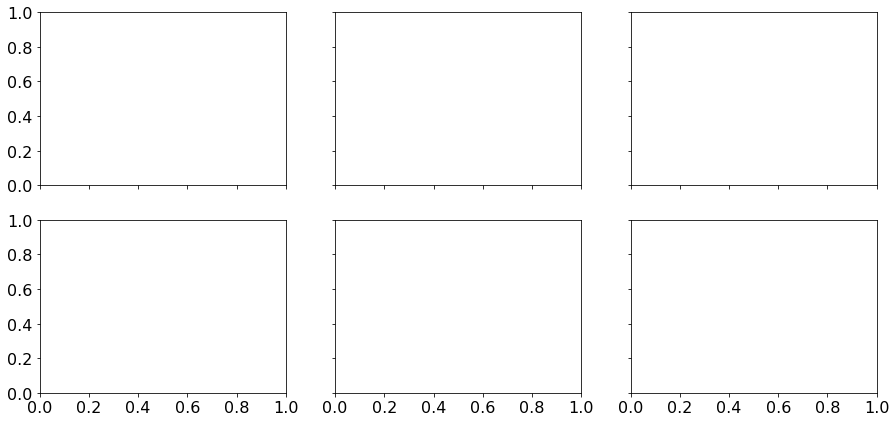

In [127]:
# class number vs N
#plt.figure(figsize=(10,10))
#plt.scatter(TM_data_rank['S-unit ranks'], TM_data_rank.index , s=2.5)
#plt.xlabel('conductor')
#plt.ylabel('class number')
#plt.title('Distribution of class number vs conductor')
#plt.tight_layout()
#plt.show()

fig, ax = plt.subplots(2,3,figsize=(15, 7), sharex=True, sharey=True)
ax = ax.ravel()
for i, (group_name, group_df) in enumerate(TM_data_rank):
    ax[i].scatter(
        TM_data_rank.index, TM_data_rank['S-unit ranks'].get_group(i), alpha=.2, s=5
    )
    ax[i].set_title(f'S-unit rank {group_name} {group_df.shape}')
plt.show()

In [ ]:
# Get counts for each `(N, rank)` and then groupby rank

# generate a new dataframe for N, class number
data = {'N': TM_data_by_rank['N'], 'class number': TM_data_mean['class number'] }
TM_data_h = pd.DataFrame(data, columns = ['N','class number']).set_index('N')


df_rnk = (
    df_rank.groupby(['N', 'S-unit ranks'])
    .N.count()
    .rename('counts')
    .reset_index()
    .groupby(['S-unit ranks'])
)



In [230]:
# Take the first group from df_rnk and compute some descriptive statistics using a rolling average/std
group_df = (df_h.groupby('class number').get_group(1)).set_index('N') # get all conductors with class number 1
# then change index to N

group_roll = group_df.rolling(25000,center=True,win_type='triang') #didn't work for me: win_type='triang' but did for Aaron
df_h_mean = group_roll.mean().dropna() # take mean frequency over every 10 conductors having class number 1
df_h_std = group_roll.mean().dropna()

Text(0.5,1,'frequency of class number = 1 over N, smoothed')

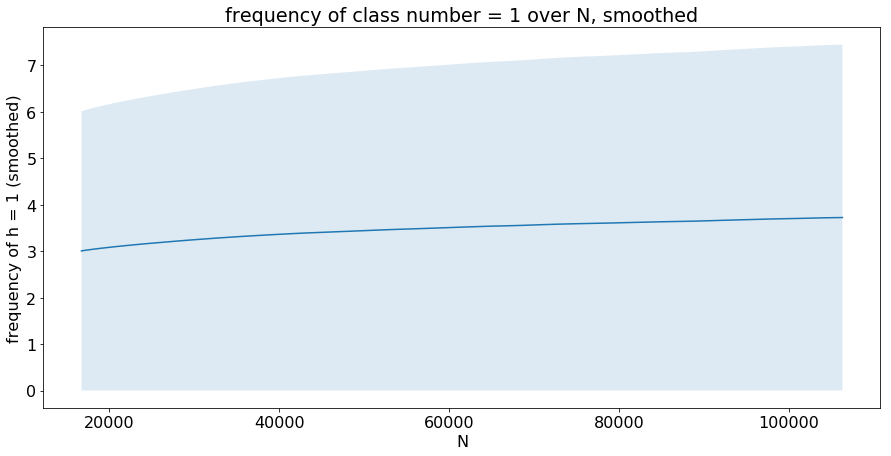

In [231]:
fig, ax = plt.subplots(1,1,figsize=(15,7))

ax.fill_between(
    df_h_std.index, 
    df_h_mean['frequency'].values - df_h_std['frequency'].values, 
    df_h_mean['frequency'].values + df_h_std['frequency'].values,
    alpha=.15,
)
ax.plot(df_h_mean.index, df_h_mean['frequency'].values)
ax.set_xlabel('N')
ax.set_ylabel('frequency of h = 1 (smoothed)')
ax.set_title('frequency of class number = 1 over N, smoothed')

# should this graph be smooth? 

# Rank of S-unit equations

We recall that we split our data based on S-unit equations and their corresponding ranks

In [11]:
# Get counts for each `(N, rank)` and then groupby rank

data = 

df_rnk = (
    df_rank.groupby(['N', 'S-unit ranks'])
    .N.count()
    .rename('counts')
    .reset_index()
    .groupby(['S-unit ranks'])
)

#fig, ax = plt.subplots(2,3,figsize=(15, 7))
#ax = ax.ravel()

plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16

pd.value_counts(df_rank['S-unit ranks'].values).plot(kind='hist', figsize=(10,5))

#plt.xlabel('S-unit ranks')
#plt.ylabel('count')
#plt.tight_layout()

In [18]:
df_rnk['N'].head()

0             11
1             18
2             19
3             22
4             26
5             26
8             35
9             37
11            38
17            51
56           110
80           141
82           142
98           158
105          170
466          470
519          506
560          546
601          574
799          710
2119        1518
2601        1806
3243        2170
4742        2990
5122        3198
23782      12210
29662      14910
31709      15834
35767      17670
40745      19866
189323     81510
234061     99330
257397    108570
Name: N, dtype: int64

# Garbaggio as far as I know

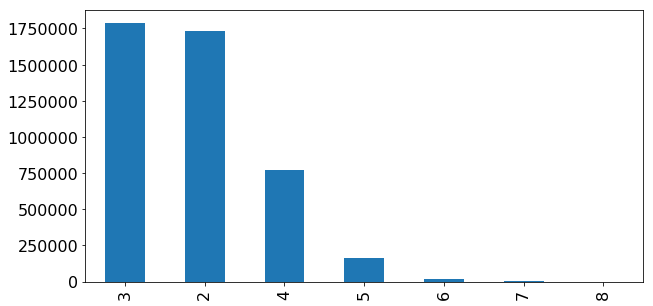

In [55]:
#fig, ax = plt.subplots(2,3,figsize=(15, 7))
#ax = ax.ravel()

plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16

pd.value_counts(df_rank['S-unit ranks'].values).plot(kind='hist', figsize=(10,5))

#plt.xlabel('S-unit ranks')
#plt.ylabel('count')
#plt.tight_layout()

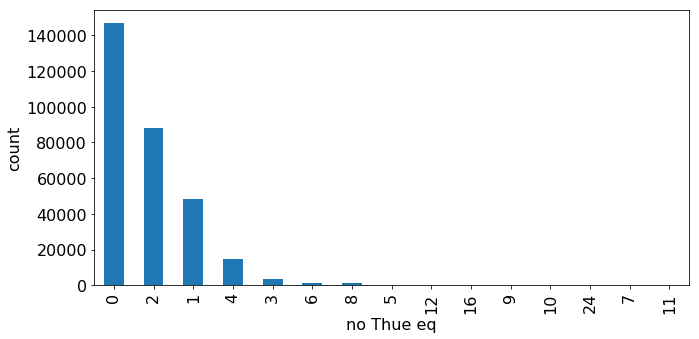

In [5]:
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16

pd.value_counts(df['no Thue eq'].values).plot(kind='bar', figsize=(10,5))
plt.xlabel('no Thue eq')
plt.ylabel('count')
plt.tight_layout()
# maybe not that helpful

# Comparison with N

In [ ]:
# convert strings into arrays
df['S-unit ranks'] = df['S-unit ranks'].apply(literal_eval)
df['partial obstructions'] = df['partial obstructions'].apply(literal_eval)

In [64]:
# Get counts for each `(N, rank)` and then groupby rank

df_rnk = (
    df_rank.groupby(['N', 'S-unit ranks'])
    .N.count()
    .rename('counts')
    .reset_index()
    .groupby(['S-unit ranks'])
)

In [19]:
# number of S-unit equations vs. N

data = {'N': df['N'], 'no S-unit eqs': df['S-unit ranks'].map(len) }
df_SvN = pd.DataFrame(data, columns = ['N','no S-unit eqs'])
df_SvN.head()

#df['S-unit ranks'].map(len)

,N,no S-unit eqs
0,45,2
1,26,3
2,22,2
3,18,1
4,54,2


In [59]:
sub_svN = df_SvN.sample(n=1000)

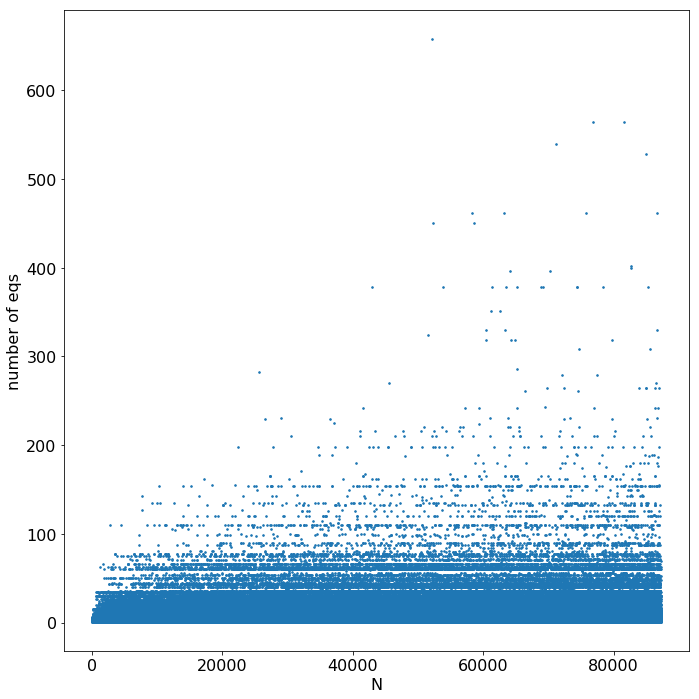

In [61]:
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.figure(figsize=(10,10))
plt.scatter(df_SvN['N'], df_SvN['no S-unit eqs'], s=2.5)
plt.xlabel('N')
plt.ylabel('number of eqs')
plt.tight_layout()

# can do this with a subset (see above), but seems to suggest that the number of equations is increasing, perhaps

In [34]:
sub_svN

,N,no S-unit eqs
280183,81196,12
118035,38868,24
129469,42045,6
151840,47977,11
151447,47971,60
241800,71552,1
245196,72410,4
103296,34738,7
184371,56706,8
146154,46569,14


In [58]:
# How many (N,rank) groups?
len(df_rank.groupby(["N", 'S-unit ranks']))

203637

In [53]:
# Take the first group from df_rnk and compute some descriptive statistics using a rolling average/std
rank_value, group_df = next(df_rnk.__iter__())  # don't write code like this; use .get_group(...)
print('curves with rank:', rank_value)
group_df = group_df.set_index('N')
group_roll = group_df.rolling(25, center=True, win_type=None) #didn't work for me: win_type='triang' but did for Aaron
group_roll = group_roll.counts.agg(['mean', 'std']).dropna()

curves with rank: 2


Text(0,0.5,'counts (smoothed)')

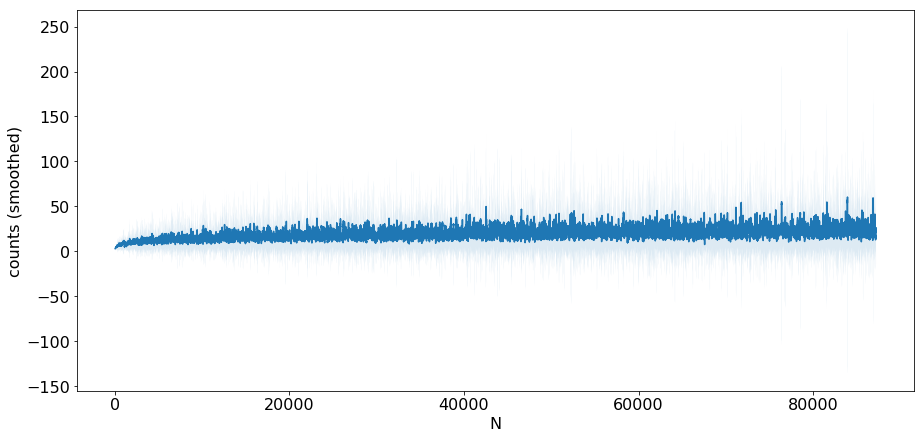

In [52]:
fig, ax = plt.subplots(1,1,figsize=(15,7))
ax.fill_between(
    group_roll.index, 
    group_roll['mean'].values - group_roll['std'].values, 
    group_roll['mean'].values + group_roll['std'].values,
    alpha=.15,
)
ax.plot(group_roll.index, group_roll['mean'].values)
ax.set_xlabel('N')
ax.set_ylabel('counts (smoothed)')

In [67]:
# grouping data

df['form'].unique()
groupby_rank = df.groupby(by=['rank'])
df_count = groupby_rank.count()
df_count


,N,discriminant,form,initial bound,min poly,optimal form
rank,,,,,,
2,4,4,4,4,4,4
4,4,4,4,4,4,4
5,3,3,3,3,3,3


In [17]:
df_rnkonly = pd.value_counts(df['rank'].values) # gives you exactly the count instead of all other columns
# can't do value counts of 2 columns; should do groupby .count instead
df_rnkN = df.groupby(['N','rank']).N.count().rename('counts').reset_index()#.groupby(['rank'])


In [18]:
df_rnkN.head(5)

,N,rank,counts
0,11,2,2
1,18,2,1
2,19,2,2
3,22,2,2
4,26,2,2


In [ ]:
fig, ax = plt.subplot(2,3,figsize=(15, 7)), sharex=True,sharey=True)
ax = ax.ravel()
for i, (group_)

In [6]:
print(df.columns)
df.head(2)
df['rank']
count = df.groupby(by=['rank']).count()
#ave = df.groupby(by=['rank']).mean()
count_series = count.iloc[:,0]



Index(['N', 'discriminant', 'form', 'min poly', 'optimal form', 'rank'], dtype='object')


In [4]:
tuple(['a' for i in range(0,3)])

('a', 'a', 'a')

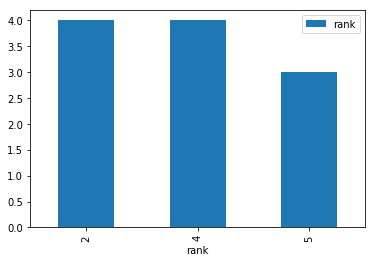

In [756]:
features_of_interest = pd.DataFrame({'rank': count_series})
features_of_interest.plot(kind='bar')

In [722]:
df.groupby(['N']).mean()
df

,N,discriminant,form,initial bound,min poly,optimal form,rank
0,18,-54,"(1, 0, 3, 2)",5494093,"(1, 0, 3, 2)","(1, 0, 3, 2)",2
1,22,-11,"(1, 2, 2, 2)",953483677,"(1, 2, 2, 2)","(1, 2, 2, 2)",2
2,45,-27,"(1, 3, 3, 3)",177382077,"(1, 3, 3, 3)","(1, 3, 3, 3)",2
3,45,-27,"(1, 3, 3, 3)",177382753,"(1, 3, 3, 3)","(1, 3, 3, 3)",2
4,112359,-112359,"(4, 7, 4, 33)",22408533661262150,"(1, 7, 16, 528)","(4, 7, 4, 33)",4
5,112359,-112359,"(4, 7, 4, 33)",22408533661262142,"(1, 7, 16, 528)","(4, 7, 4, 33)",4
6,112359,-112359,"(4, 7, 4, 33)",22408533661262115,"(1, 7, 16, 528)","(4, 7, 4, 33)",4
7,112359,-112359,"(4, 7, 4, 33)",22408533661262145,"(1, 7, 16, 528)","(4, 7, 4, 33)",4
8,112359,-112359,"(4, 7, 4, 33)",22408533661262165,"(1, 7, 16, 528)","(4, 7, 4, 33)",5
9,112359,-112359,"(4, 7, 4, 33)",22408533661262147,"(1, 7, 16, 528)","(4, 7, 4, 33)",5


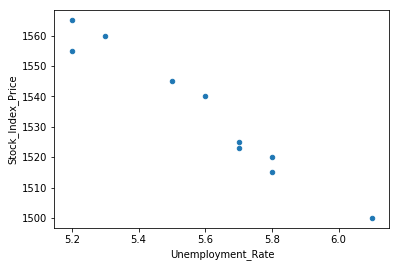

In [669]:
from pandas import DataFrame
import matplotlib.pyplot as plt
   
Data = {'Unemployment_Rate': [6.1,5.8,5.7,5.7,5.8,5.6,5.5,5.3,5.2,5.2],
        'Stock_Index_Price': [1500,1520,1525,1523,1515,1540,1545,1560,1555,1565]
       }
  
df = DataFrame(Data,columns=['Unemployment_Rate','Stock_Index_Price'])
df.plot(x ='Unemployment_Rate', y='Stock_Index_Price', kind = 'scatter')
plt.show()